In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression

In [5]:
X, y = make_regression(n_samples=500, n_features=1, bias=4.5, noise=3.3)

In [6]:
print(X.shape, y.shape)

(500, 1) (500,)


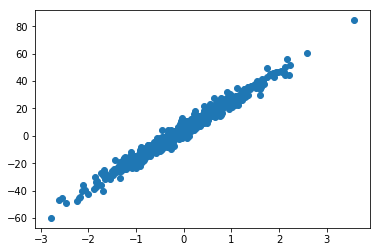

In [7]:
plt.figure()
plt.scatter(X[:,0], y)
plt.show()

In [43]:
class UniVariateLinearRegression:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.coef = np.random.uniform(low=-1, high=1)
        self.bias = np.random.random()
        
    def compute_loss(self):
        losses = []
        for x,y in zip(self.X, self.y):
            yhat = self.predict(x)
            loss = (y - yhat)**2
            losses.append(loss)
        
        losses = np.array(losses)
        return losses.sum() / (2 * self.X.shape[0])
    
    ### Gradient Descent
    def calculate_gradients(self):
        grad_00, grad_01 = list(), list()
        
        for x,y in zip(self.X, self.y):
            yhat = self.predict(x)
            grad_00.append(yhat - y)
            grad_01.append((yhat - y)*x)
        
        grad_00, grad_01 = np.array(grad_00), np.array(grad_01)
        grad_00 = grad_00.sum() / (self.X.shape[0])
        grad_01 = grad_01.sum() / (self.X.shape[0])
        return (grad_00, grad_01) # Bias, Coef
    
    def update_weights(self, gradients, learning_rate):
        self.bias = self.bias - (learning_rate * gradients[0])
        self.coef = self.coef - (learning_rate * gradients[1])
    ### 
    
    def predict(self, x):
        return self.coef * x + self.bias
    
    def score(self):
        pass
    
    def get_all_preds(self):
        preds = []
        for x in self.X:
            preds.append(self.predict(x))
        return preds
    
    def train(self, losses, iterations=1, alpha=0.01):
        for _ in range(iterations):
            gradients = self.calculate_gradients()
            self.update_weights(gradients, alpha)
            losses.append(self.compute_loss())
        return losses

### Initialising Model

In [94]:
univariate = UniVariateLinearRegression(X, y)
losses = [univariate.compute_loss()]

In [95]:
losses

[210.55936443361355]

In [96]:
initial_preds = univariate.get_all_preds()

In [97]:
def plot_best_fit(X, y, preds, title=''):
    plt.figure()
    plt.title(title)
    plt.scatter(X[:, 0], y)
    plt.plot(X[:, 0], preds, 'r')
    plt.show()

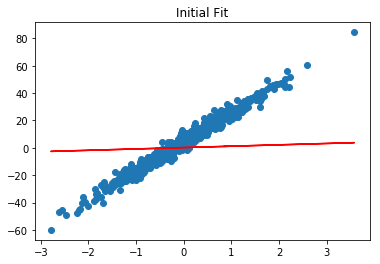

In [98]:
plot_best_fit(X, y, initial_preds, 'Initial Fit')

### Training Model

In [102]:
losses = univariate.train(losses, iterations=200, alpha=0.01)
losses[-10:]

[6.10277969560787,
 6.088057109386991,
 6.0736136830183645,
 6.059444120546921,
 6.04554322654219,
 6.0319059041891,
 6.018527153415065,
 6.005402069052658,
 5.9925258390371745,
 5.979893742638506]

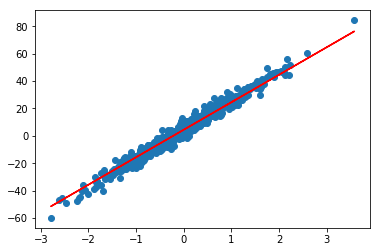

In [103]:
preds = univariate.get_all_preds()
plot_best_fit(X, y, preds)

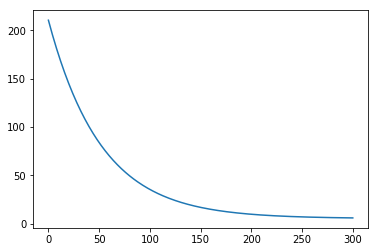

In [104]:
plt.figure()
plt.plot(losses)
plt.show()

## SKlearn

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [108]:
boston = load_boston()

In [111]:
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [116]:
# boston.feature_names
# boston.DESCR

In [118]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [119]:
sklinreg = LinearRegression(normalize=True)

In [120]:
sklinreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [122]:
print("Train:", sklinreg.score(X_train, y_train))
print("Test:", sklinreg.score(X_test, y_test))

Train: 0.7485272532092714
Test: 0.6952578983550721
